✅ Dados extraídos com sucesso!

Visualização inicial:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes   

/tmp/ipython-input-1680220420.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churn', palette='Set2')


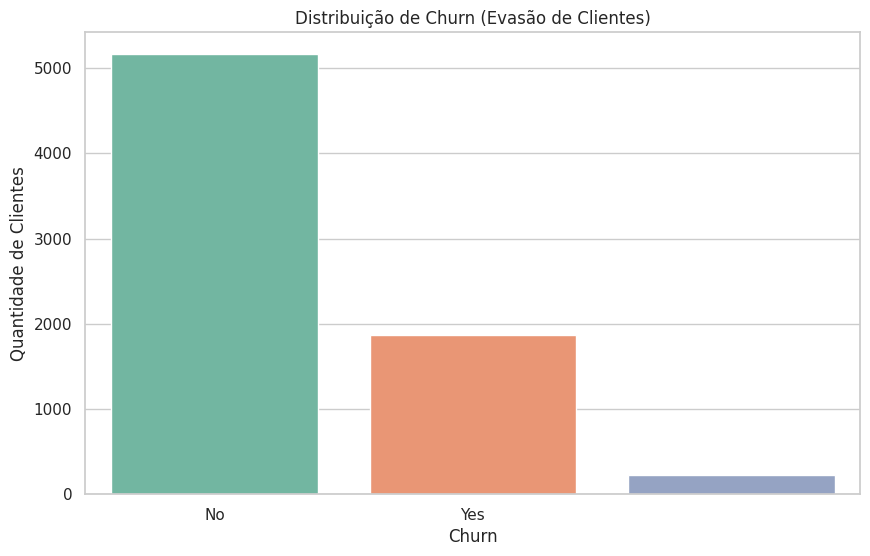

/tmp/ipython-input-1680220420.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='account_charges_total', palette='Set1')


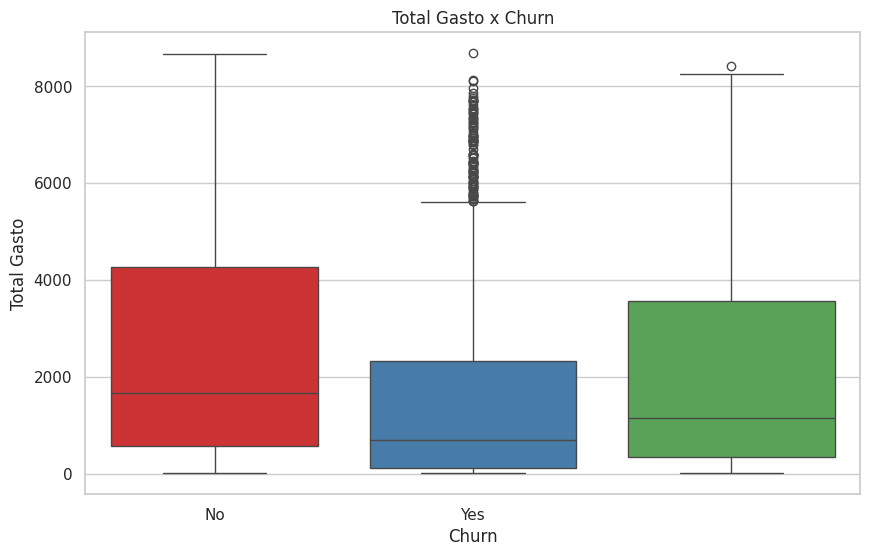

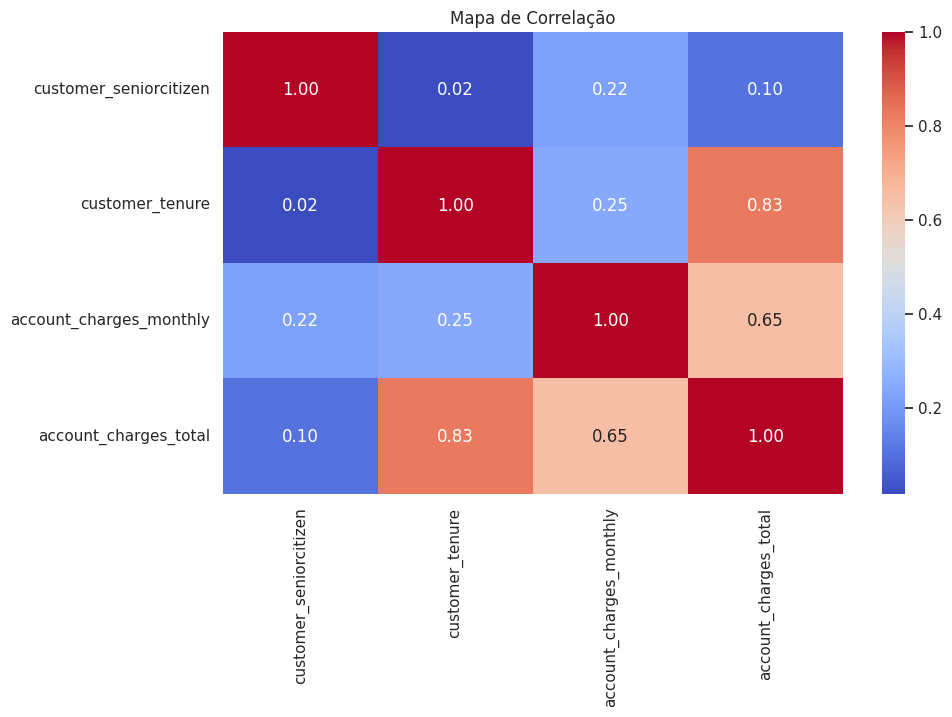

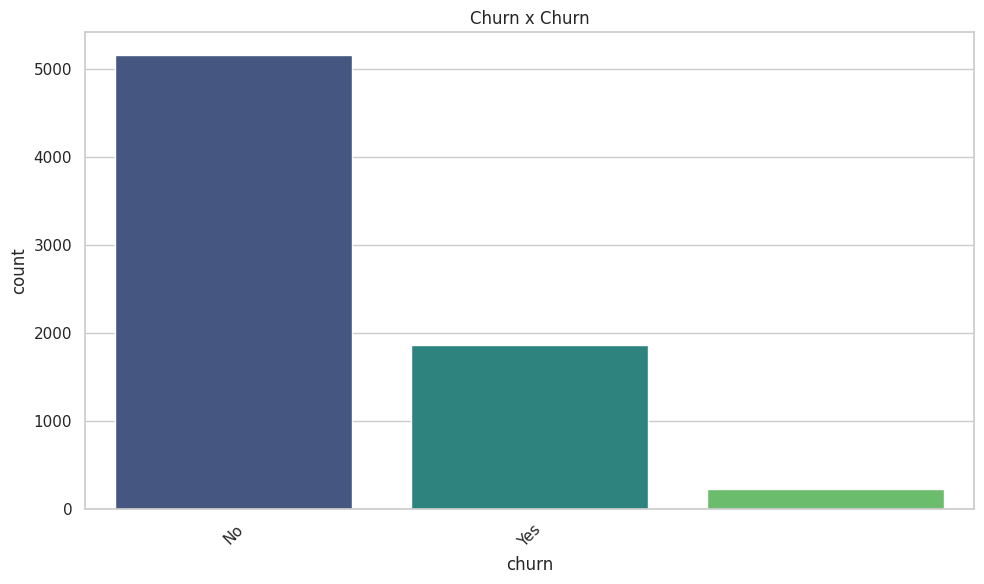

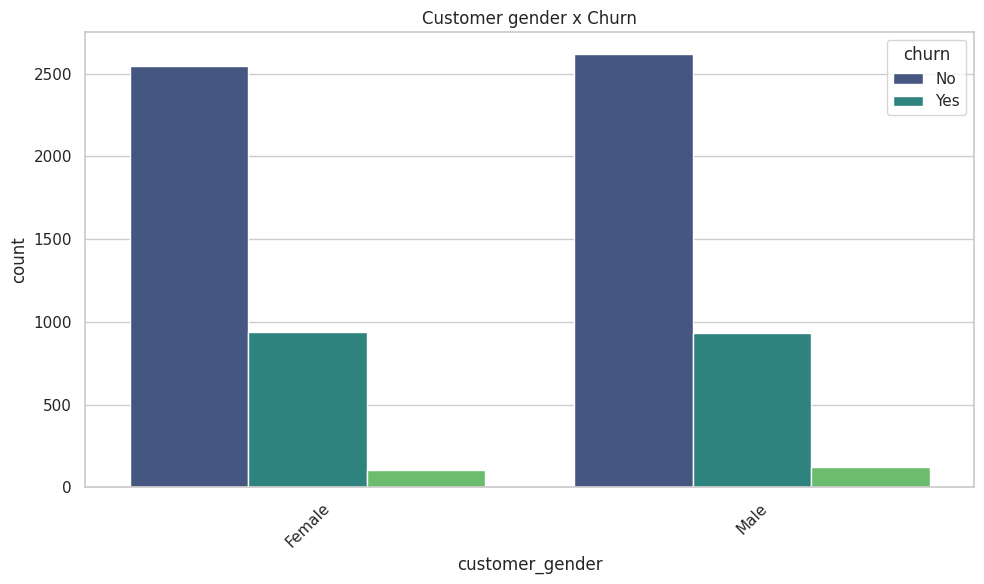

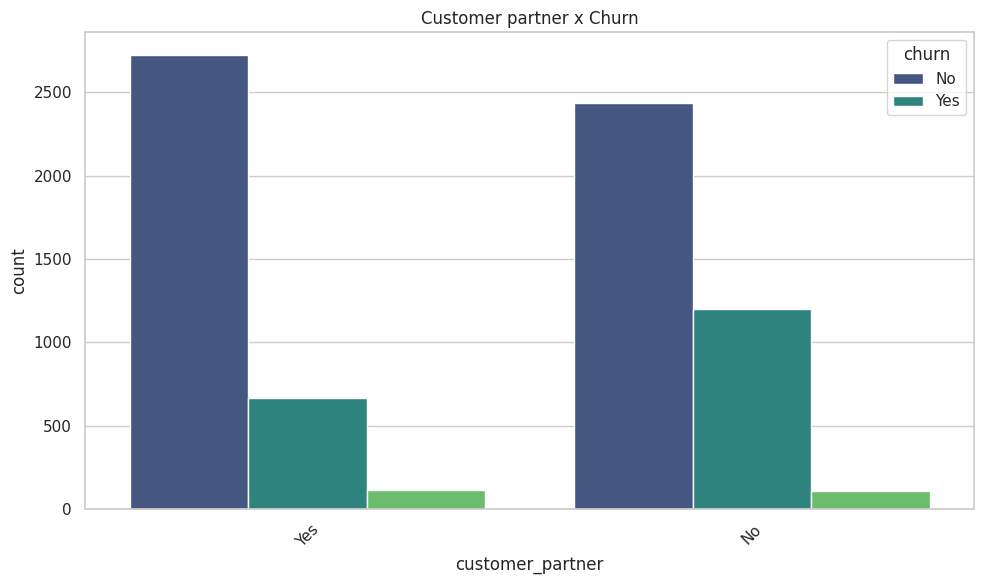

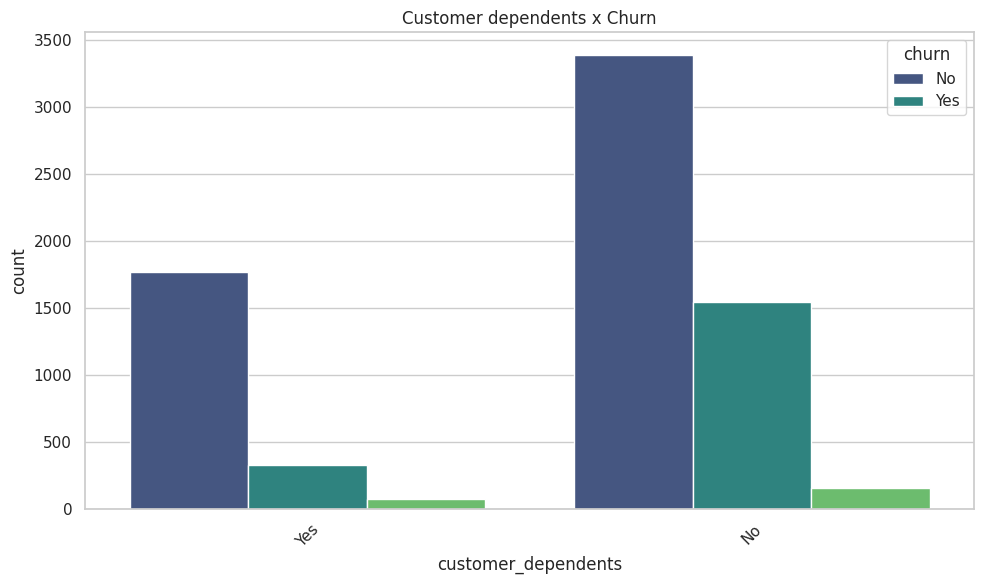

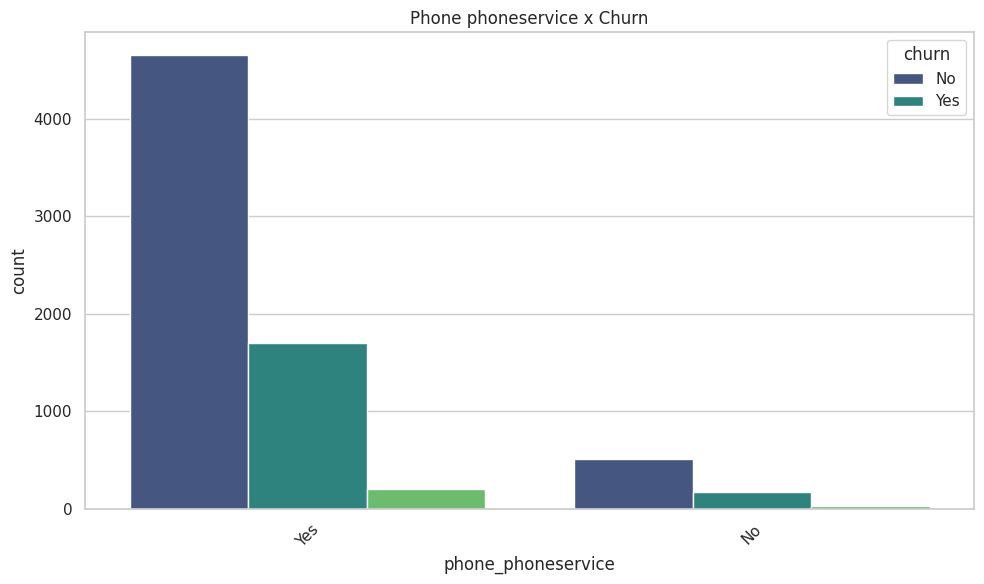

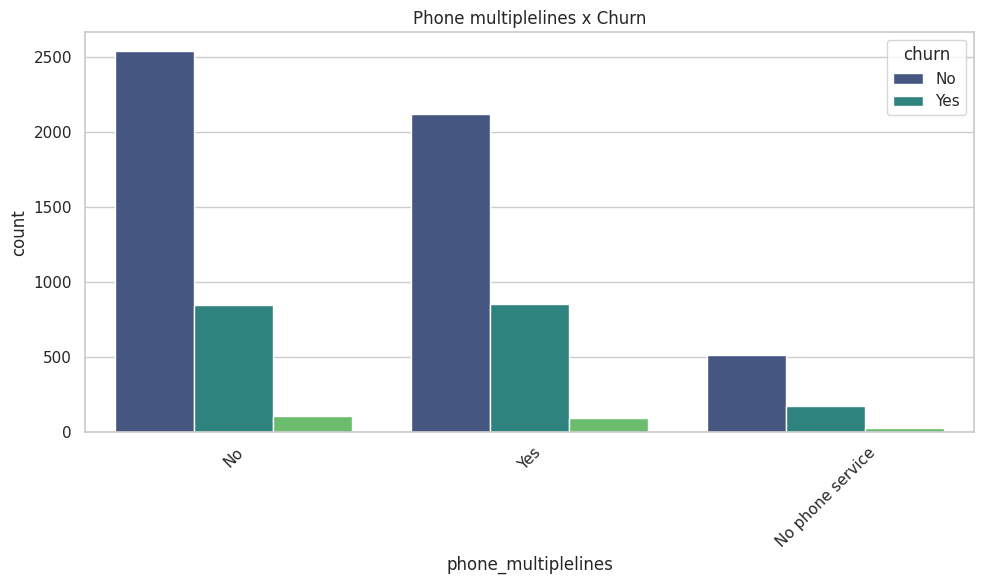

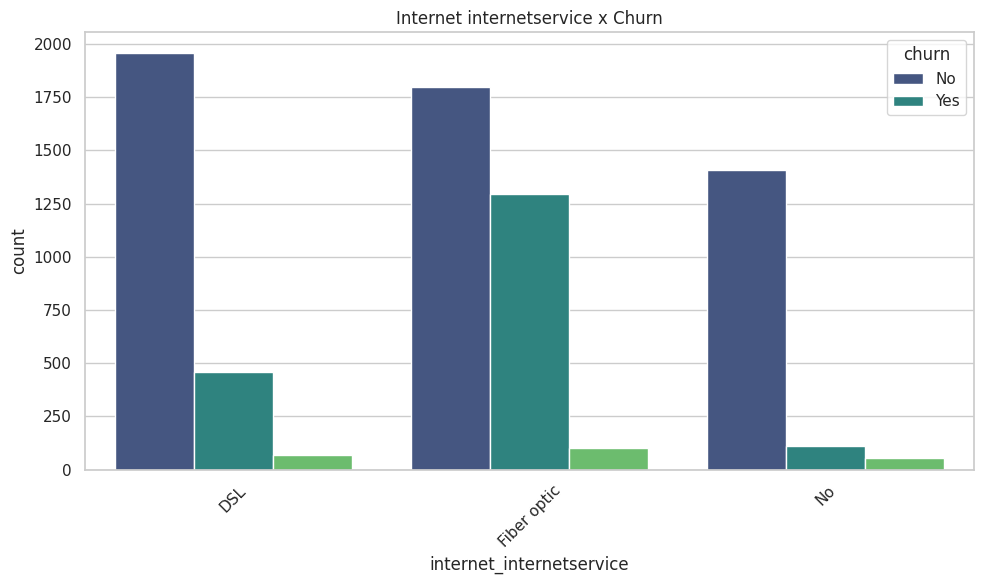

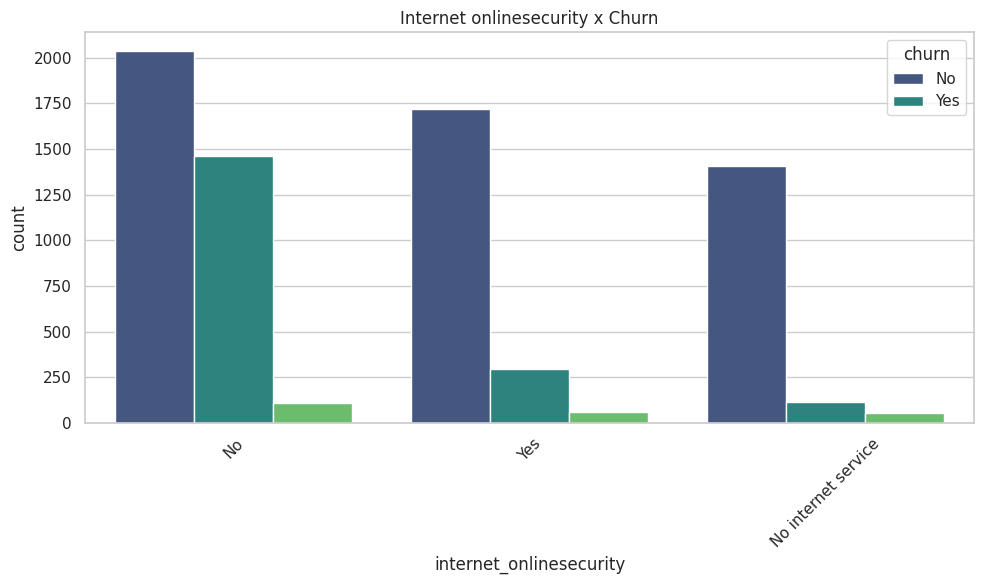

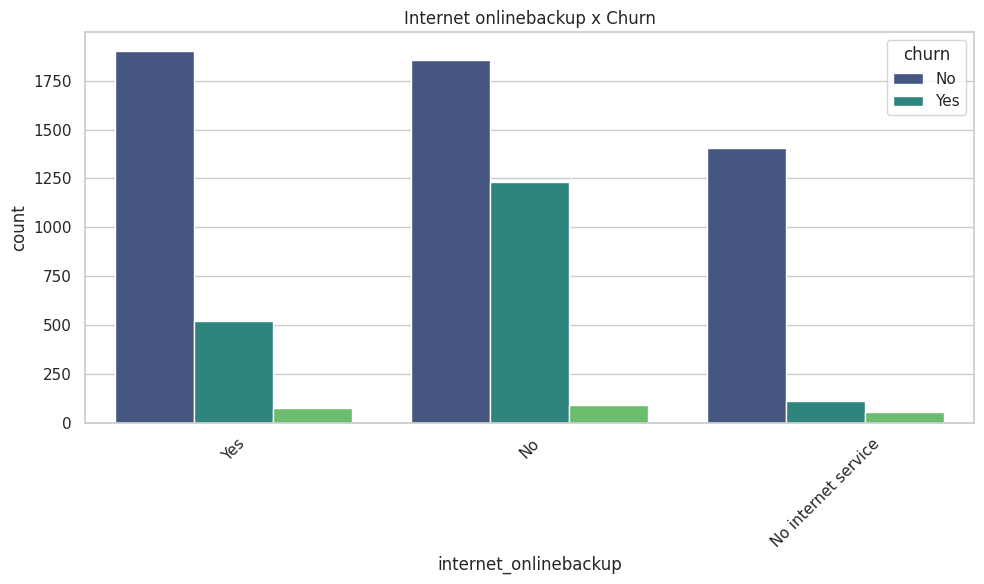

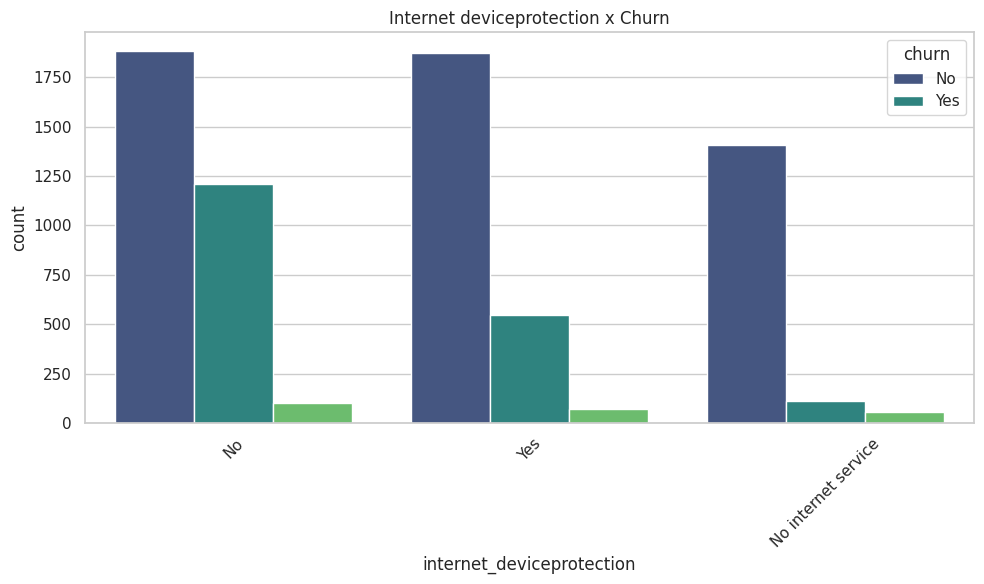

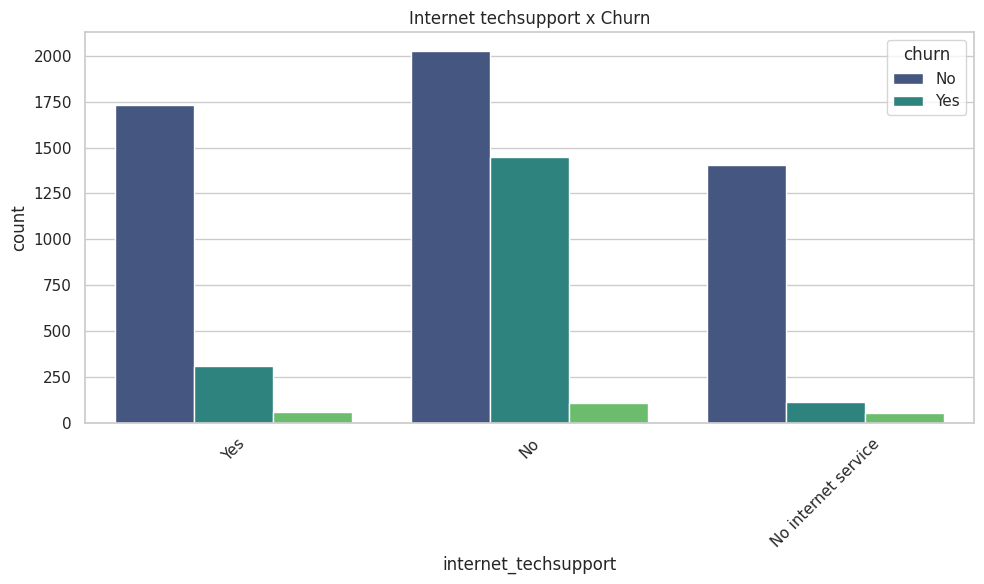

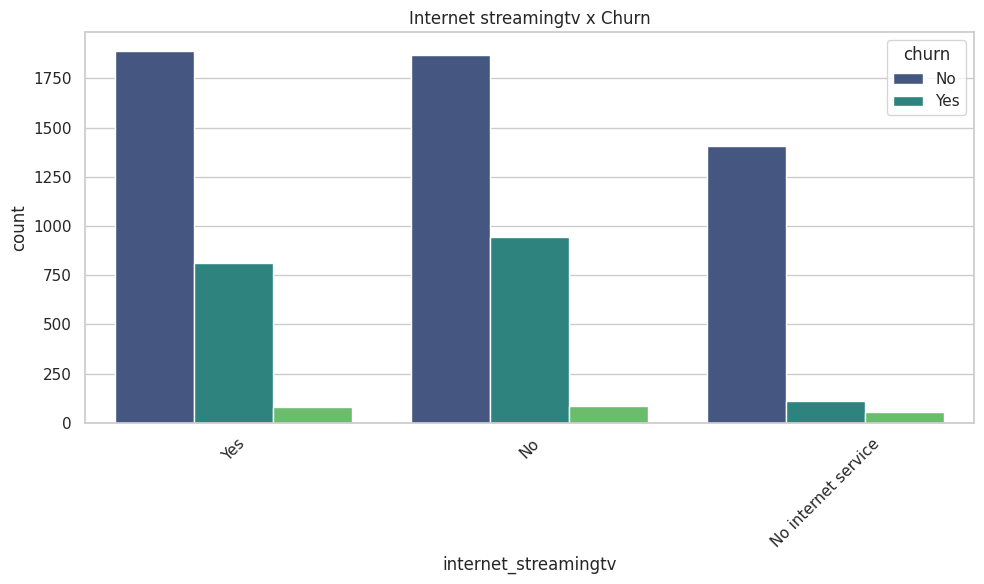

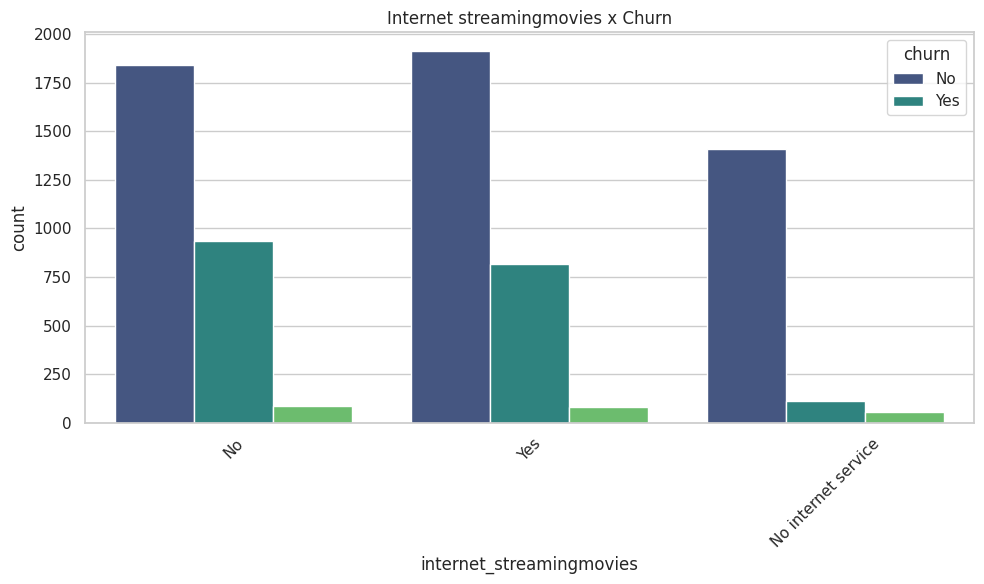

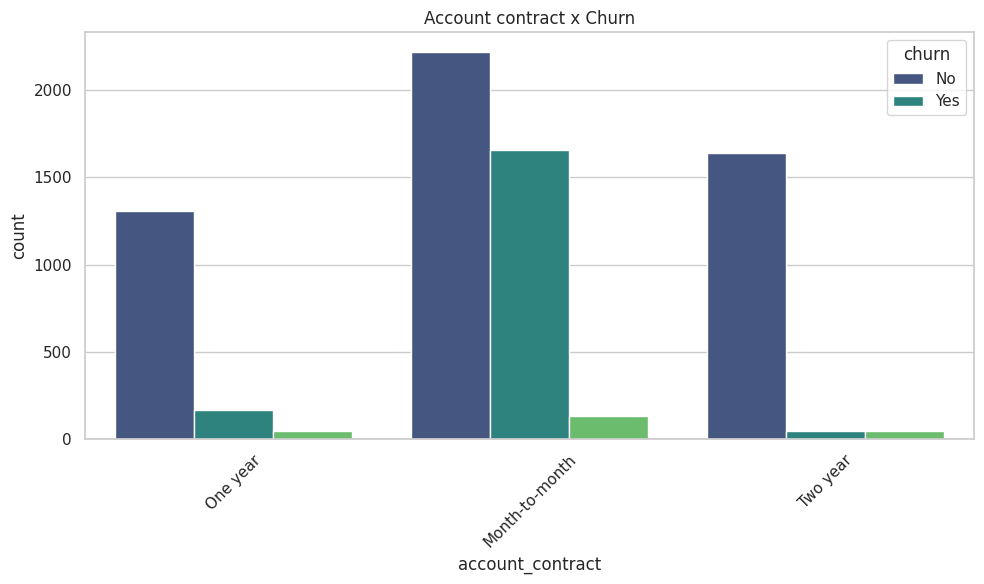

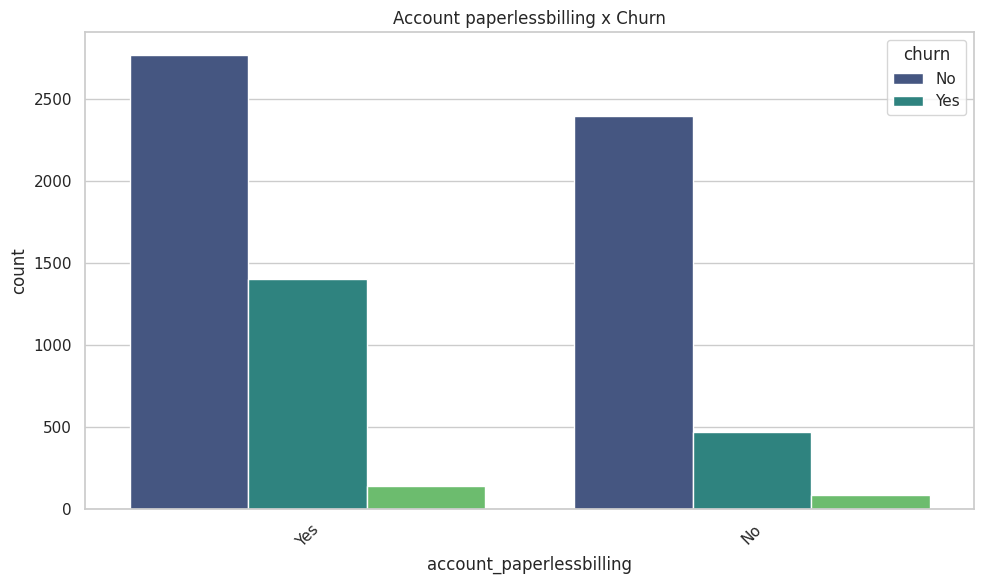

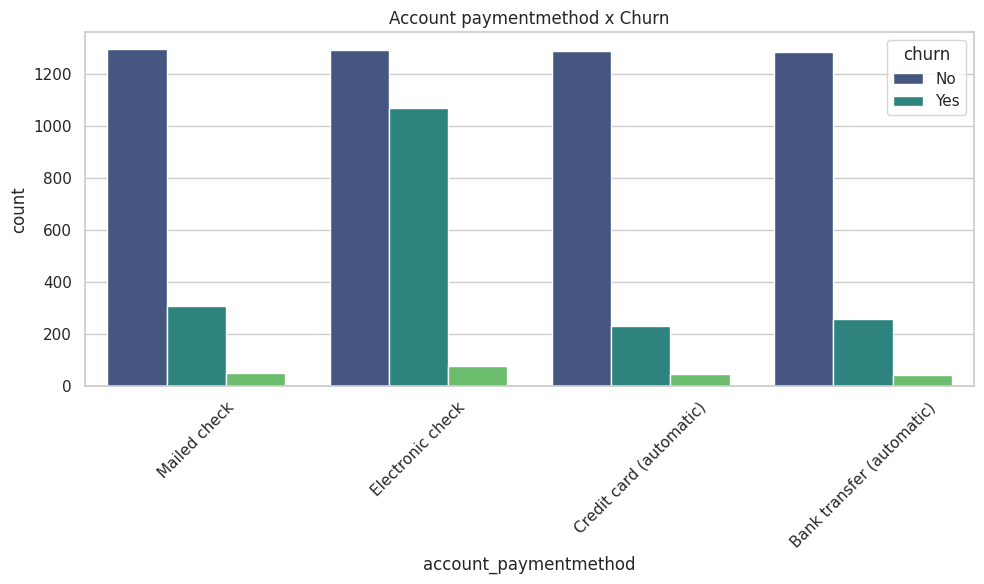


📊 RELATÓRIO FINAL

OBJETIVO:
Analisar os dados da empresa Telecom X para entender os motivos da evasão de clientes (churn), utilizando técnicas de ETL e análise exploratória.

PROCESSO DE ETL:
- Extração: realizada a partir de uma API (arquivo JSON no GitHub).
- Transformação: padronização de colunas, conversão de tipos, remoção e tratamento de nulos.
- Carga: dados carregados em um DataFrame limpo, pronto para análise.

INSIGHTS:
- Clientes que cancelaram tendem a ter um gasto total menor.
- Contratos mensais e pagamentos via boleto apresentam maiores taxas de churn.
- Algumas variáveis como suporte técnico e tipo de serviço contratados estão associadas à permanência ou saída do cliente.

SUGESTÕES:
- Criar incentivos para contratos mais longos (anuais).
- Oferecer descontos para migração de métodos de pagamento.
- Melhorar a experiência de suporte para aumentar a satisfação.

CONCLUSÃO:
Os dados mostram padrões claros de comportamentos associados ao churn. As sugestões podem ajudar 

In [2]:
# Projeto: Telecom X - ETL e Análise Exploratória (EDA)

# 1. Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

sns.set_theme(style='whitegrid')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Extração de dados da API
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)

if response.status_code == 200:
    dados = response.json()
    df = pd.json_normalize(dados)
    print("✅ Dados extraídos com sucesso!\n")
else:
    raise Exception(f"Erro ao acessar os dados: {response.status_code}")

# 3. Análise inicial dos dados
print("Visualização inicial:")
print(df.head())
print("\nDimensões:", df.shape)
print("\nInformações:")
df.info()
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# 4. Limpeza e transformação dos dados
# Padronizar nomes de colunas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(".", "_")

# Converter total_gasto (account_charges_total) para numérico
df['account_charges_total'] = pd.to_numeric(df['account_charges_total'], errors='coerce')

# Remover colunas com mais de 50% de valores nulos
df = df.loc[:, df.isnull().mean() < 0.5]

# Remover linhas com valores nulos restantes
df.dropna(inplace=True)

print("\n✅ Dados tratados. Novas dimensões:", df.shape)

# 5. Análise Exploratória de Dados (EDA)
print("\nEstatísticas descritivas:")
print(df.describe())

# Distribuição de churn
sns.countplot(data=df, x='churn', palette='Set2')
plt.title('Distribuição de Churn (Evasão de Clientes)')
plt.xlabel('Churn')
plt.ylabel('Quantidade de Clientes')
plt.show()

# Total gasto x churn
sns.boxplot(data=df, x='churn', y='account_charges_total', palette='Set1')
plt.title('Total Gasto x Churn')
plt.xlabel('Churn')
plt.ylabel('Total Gasto')
plt.show()

# Correlação
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlação")
plt.show()

# Gráficos de barras por variáveis categóricas
categoricas = df.select_dtypes(include='object').columns

for coluna in categoricas:
    if coluna != 'customerid':  # Ignorar ID
        plt.figure()
        sns.countplot(data=df, x=coluna, hue='churn', palette='viridis')
        plt.title(f'{coluna.replace("_", " ").capitalize()} x Churn')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 6. Relatório Final
print("""
📊 RELATÓRIO FINAL

OBJETIVO:
Analisar os dados da empresa Telecom X para entender os motivos da evasão de clientes (churn), utilizando técnicas de ETL e análise exploratória.

PROCESSO DE ETL:
- Extração: realizada a partir de uma API (arquivo JSON no GitHub).
- Transformação: padronização de colunas, conversão de tipos, remoção e tratamento de nulos.
- Carga: dados carregados em um DataFrame limpo, pronto para análise.

INSIGHTS:
- Clientes que cancelaram tendem a ter um gasto total menor.
- Contratos mensais e pagamentos via boleto apresentam maiores taxas de churn.
- Algumas variáveis como suporte técnico e tipo de serviço contratados estão associadas à permanência ou saída do cliente.

SUGESTÕES:
- Criar incentivos para contratos mais longos (anuais).
- Oferecer descontos para migração de métodos de pagamento.
- Melhorar a experiência de suporte para aumentar a satisfação.

CONCLUSÃO:
Os dados mostram padrões claros de comportamentos associados ao churn. As sugestões podem ajudar a equipe a implementar estratégias de retenção mais eficazes.
""")
